In [3]:
from ThesisFunctions import *

In [40]:
# Required libraries for mathematical operations, data manipulation, and plotting.
import numpy as np
import pandas as pd
import sympy as sp
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import sympy.plotting as spp
from sympy import symbols, diff, Poly, solve
from mpl_toolkits.mplot3d import Axes3D

def model_2D(t, A_1, alpha_1, A_2, alpha_2):
    """
    """
    exp_input1 = float(alpha_1) * np.array(t, dtype=float)
    exp_input2 = float(alpha_2) * np.array(t, dtype=float)
    return A_1 * np.exp(exp_input1) + A_2 * np.exp(exp_input2)


def sse_2D(params, data):
    """
    """
    A_1, alpha_1, A_2, alpha_2 = params
    predictions = model_2d(data['Time'], A_1, alpha_1, A_2, alpha_2)
    return np.sum((data['Data'] - predictions) ** 2)


def data_gen_2D(num_data_points=4, noise_level=0.1, A_1=1, alpha_1=1, A_2=1, alpha_2=1):
    """
    """
    t = np.arange(num_data_points)
    x = A_1 * np.exp(alpha_1 * t) + A_2 * np.exp(alpha_2 * t)
                                                 
    noise = noise_level * x *  np.random.normal(0, 1, size=t.shape) * 0.1
         
    x_noisy = x + noise    

    x_noisy_rational = np.array([min(sp.Rational(int(xn * 100), 100), 10000) for xn in x_noisy])
    data = pd.DataFrame({'Time': t, 'Data': x_noisy_rational})
    return data

def groeb_2D(x_i, t_i):
    """
    """
    A_1, b_1, A_2, b_2 = sp.symbols('A_1 b_1 A_2 b_2')
    SSE_poly = sum([(x - (A_1 * b_1**t + A_2 * b_2**t))**2 for x, t in zip(x_i, t_i)])
    print(SSE_poly)
    partial_A_1 = sp.diff(SSE_poly, A_1)
    partial_b_1 = sp.diff(SSE_poly, b_1)
    partial_A_2 = sp.diff(SSE_poly, A_2)
    partial_b_2 = sp.diff(SSE_poly, b_2)
    
    B = sp.groebner([partial_A_1, partial_b_1, partial_A_2, partial_b_2], A_1, b_1, A_2, b_2, order='lex')
    
    return B

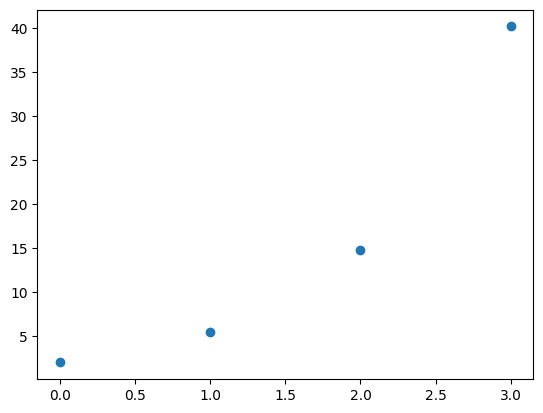

In [56]:
data = data_gen_2D(4, 0, 1, 1, 1, 1)

x_i = np.array(data['Data'].values)
t_i = np.array(data['Time'].values)
plt.scatter(t_i, x_i)

In [57]:
A_1, b_1, A_2, b_2 = sp.symbols('A_1 b_1 A_2 b_2')
SSE_poly = sum([(x - (A_1 * b_1**t + A_2 * b_2**t))**2 for x, t in zip(x_i, t_i)])
print(SSE_poly)

(-A_1 - A_2 + 2)**2 + (-A_1*b_1 - A_2*b_2 + 543/100)**2 + (-A_1*b_1**2 - A_2*b_2**2 + 1477/100)**2 + (-A_1*b_1**3 - A_2*b_2**3 + 4017/100)**2


In [52]:
# Calculate the Groebner basis.
B = groeb_2D(x_i, t_i)
print(B)

(-A_1 - A_2 + 2)**2 + (-A_1*b_1 - A_2*b_2 + 543/100)**2 + (-A_1*b_1**2 - A_2*b_2**2 + 1477/100)**2
GroebnerBasis([A_1 - A_2*b_1*b_2**3/3 - 2*A_2*b_1*b_2/3 + 5042244319074958001812759277191407876331133600*A_2*b_2**11/289215711925024286247058495337732841885888399 - 14963588356982712259110682115410090909625136216*A_2*b_2**10/96405237308341428749019498445910947295296133 + 70001391394905378421955162130707667411788553048388973176*A_2*b_2**9/145319839393304945935756527602109477534312148641671427 - 4887942243347998631057247910813684669166761152022581142*A_2*b_2**8/7648412599647628733460869873795235659700639402193233 + 76398607308380698552727577549306326058150460693204313914*A_2*b_2**7/145319839393304945935756527602109477534312148641671427 - 181059342880300273840016589975280730468841707719279112*A_2*b_2**6/1670342981532240757882258937955281350969105156800821 - 295201311825677900543367946455447755865952161015138806461*A_2*b_2**5/145319839393304945935756527602109477534312148641671427 + 7344965822

In [39]:
for b in B:
    print(b)
    print(" ")
    print(" ")
    print(" ")

A_1 + 108600*A_2*b_1/334849 - 108600*A_2*b_2/334849 + A_2 - 217200*b_1/334849 - 80000/334849
 
 
 
A_2*b_1**2 + 400*A_2*b_1/543 - A_2*b_2**2 - 400*A_2*b_2/543 - 2*b_1**2 - 2*b_1*b_2 + 214849*b_1/54300 + 543*b_2/100 + 4
 
 
 
A_2**2*b_1 - A_2**2*b_2 - 2*A_2*b_1 + 543*A_2/100
 
 
 
A_2*b_1*b_2 + 200*A_2*b_1/543 - A_2*b_2**2 - 200*A_2*b_2/543 - 2*b_1*b_2 - 400*b_1/543 + 543*b_2/100 + 2
 
 
 


In [27]:
positive_roots_b

[]

In [ ]:
 # Determine (x0, alpha) pairs.
    params = find_x0_alpha_pairs(B, positive_roots_b)

    # Evaluate the Hessian to check for minima.
    maxima_checks = evaluate_hessian_at_extremas(params, x_i, t_i)